In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
#načítanie datasetu
data = pd.read_csv("dataset_stroke.csv")

In [ ]:
data

In [ ]:
#z datasetu je zrejmé, že posledná osoba ktorá mala mrtvicu má "id" 43424
#ked si danú osobu vypíšeme, zistíme, že prvých 249 záznamov v datasete malo mrtvicu (potom sú už len 0)
last_person_with_stroke = data[data["id"]==43424]
last_person_with_stroke

In [ ]:
#zahodíme nepotrebné stĺpce, aby sme pracovali len s faktormi, ktoré nás zaujímajú
data = data.drop(data.columns[[0, 6, 7, 8, 9, 10]], axis=1)

In [ ]:
data

In [ ]:
#zoberieme prvých 496 záznamov, polovica mala mrtvicu, druhá nie
data = data.head(496)

In [ ]:
data

In [ ]:
#zistíme najmenší vek respondenta = 0.64 rokov
data[data["age"]==data["age"].min()]

In [ ]:
#zistíme najväčší vek respondenta = 82 rokov
data[data["age"]==data["age"].max()]

In [ ]:
#preštylizujeme si dáta, kedže neuronová sieť nevie pracovať so Stringami
#pohlavie bude 1 ak je to muž, v opačnom prípade bude 0
#to či bol človek ženatý bude 1 ak áno, ak nie tak 0
data.loc[data['gender'] == "Male", 'gender'] = 1
data.loc[data['gender'] == "Female", 'gender'] = 0
data.loc[data['ever_married'] == "Yes", 'ever_married'] = 1
data.loc[data['ever_married'] == "No", 'ever_married'] = 0
data

In [ ]:
#vyberieme si X-sové hodnoty (vstupy)
#preštylizujeme ich na float32, kedže inak keras hádže error
X = data.iloc[:, [0,1,2,3,4]].values
X = np.asarray(X).astype('float32')

In [ ]:
X

In [ ]:
#vyberieme požadovaný výstup
Y = data.iloc[:, 5].values

In [ ]:
Y

In [ ]:
#vytvoríme si testovacie a trénovacie dáta, pomocou knižnice sklearn
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, train_size=0.8, random_state=1)

In [114]:
#vytvoríme si Keras Model
#aktivačné funkcie sú relu, relu a sigmoid
model = Sequential()
model.add(Dense(100, input_dim=5, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [115]:
#určíme si optimizer
#natrénujeme neurónovú sieť
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_Train, Y_Train, validation_data=(X_Test, Y_Test), epochs=10, batch_size=100)
scores=model.evaluate(X_Train,Y_Train)

Epoch 1/10
4/4 [==============================] - 1s 100ms/step - loss: 0.6931 - accuracy: 0.4673 - val_loss: 0.6933 - val_accuracy: 0.4500
Epoch 2/10
4/4 [==============================] - 0s 38ms/step - loss: 0.6931 - accuracy: 0.5244 - val_loss: 0.6933 - val_accuracy: 0.4500
Epoch 3/10
4/4 [==============================] - 0s 31ms/step - loss: 0.6931 - accuracy: 0.5081 - val_loss: 0.6934 - val_accuracy: 0.4500
Epoch 4/10
4/4 [==============================] - 0s 44ms/step - loss: 0.6931 - accuracy: 0.5111 - val_loss: 0.6934 - val_accuracy: 0.4500
Epoch 5/10
4/4 [==============================] - 0s 29ms/step - loss: 0.6931 - accuracy: 0.5181 - val_loss: 0.6935 - val_accuracy: 0.4500
Epoch 6/10
4/4 [==============================] - 0s 42ms/step - loss: 0.6930 - accuracy: 0.5174 - val_loss: 0.6935 - val_accuracy: 0.4500
Epoch 7/10
4/4 [==============================] - 0s 34ms/step - loss: 0.6930 - accuracy: 0.5147 - val_loss: 0.6936 - val_accuracy: 0.4500
Epoch 8/10
4/4 [==========

In [116]:
print(scores[0]*100)

69.29835081100464


In [117]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


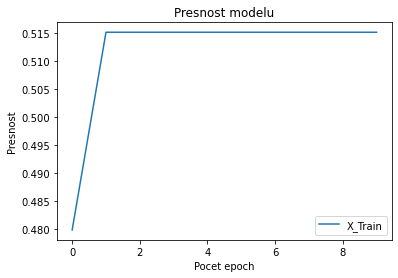

In [118]:
plt.plot(history.history['accuracy'])
plt.title('Presnost modelu')
plt.ylabel('Presnost')
plt.xlabel('Pocet epoch')
plt.legend(['X_Train'])
plt.show()

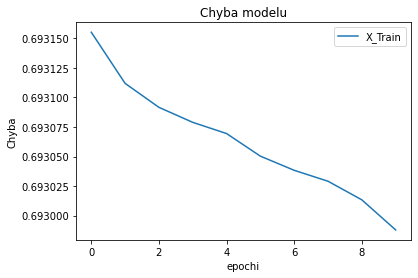

In [119]:
plt.plot(history.history['loss'])
plt.title('Chyba modelu')
plt.ylabel('Chyba')
plt.xlabel('epochi')
plt.legend(["X_Train"])
plt.show()

In [120]:
from matplotlib.colors import ListedColormap
X_Set, Y_Set = X_Train, Y_Train
#doplnit vizualizaciu

In [121]:
X_Set, Y_Set = X_Test, Y_Test
#doplnit vizualizaciu

In [122]:
def vratPredikciu(pohlavie, vek, hypertenzia, choroby_srdca, zenaty):
    dataset = pd.DataFrame({"gender":pohlavie,"age":vek,"hypertension":hypertenzia,"heart_disease":choroby_srdca,"ever_married":zenaty},index=[0])
    classificationPrediction = np.argmax(model.predict(dataset), axis=-1)
    skore = scores[0]*100
    if(classificationPrediction[0]==0):
        return "Nedostane, Presnost: "+str(skore)+"%"
    else:
        return "Dostane, Presnost: "+str(skore)+"%"

In [123]:
vratPredikciu(1,25,1,0,0)

'Nedostane, Presnost: 69.29835081100464%'